In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle
from random import sample

from utils import *

In [23]:
#selected subset of dates. 
val_dates = ['171021','171023','180711','180714']
test_dates = ['171020','171022','180712', '180713']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
#load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/'
load_path = '/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_2/'
# save_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_2_upsample'
# model_saving_path = '/home/bijanadmin/Desktop/Goose_and_Jester_data/data_Goose_all_Jester_all_2/LR_models'
model_saving_path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_all_Jester_all_2_upsample'


train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=256)

In [24]:
# Balance Validation Dataset
sleep_files = []
move_files = []
for t in range(len(val_files)):
    if 'sleep' in val_files[t][0]:
        sleep_files.append(val_files[t])
    if 'move' in val_files[t][0]:
        move_files.append(val_files[t])

sleep_sample = sample(sleep_files, len(move_files))
val_2_files = sleep_sample+move_files
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_2_files, test_files,load_path, batch_size=256)

## Check balance
# count_sleep = 0
# count_move = 0
# for t in range(len(val_2_files)):
#     if 'sleep' in val_2_files[t][0]:
#         count_sleep+=1
#     if 'move' in val_2_files[t][0]:
#         count_move +=1 
# print(count_sleep, count_move)

In [25]:
len(train_loader), len(val_loader), len(test_loader)

(251, 7, 25)

In [26]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([256, 62, 100, 10])
torch.Size([256, 1])
256
256
256


date:180327, rec:008, time:550.0, label:0.0


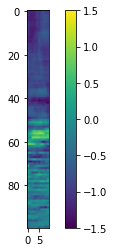

date:180409, rec:003, time:930.0, label:1.0
date:180414, rec:007, time:2017.0, label:0.0


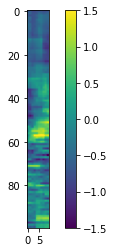

date:180330, rec:003, time:2181.0, label:1.0
date:180401, rec:001, time:1510.0, label:0.0


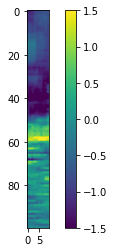

date:180323, rec:003, time:1715.0, label:1.0
date:180413, rec:001, time:3300.0, label:0.0


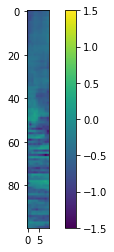

date:180330, rec:009, time:5391.0, label:0.0


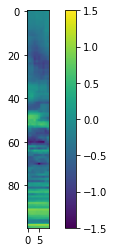

date:180323, rec:003, time:3922.0, label:1.0
date:180401, rec:001, time:5327.0, label:0.0


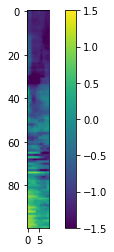

date:180414, rec:007, time:3807.0, label:0.0


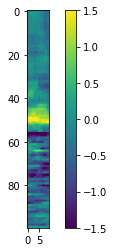

date:180413, rec:001, time:1260.0, label:0.0


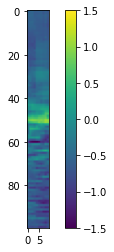

date:180331, rec:001, time:2050.0, label:0.0


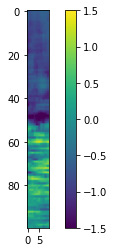

date:180327, rec:001, time:1840.0, label:0.0


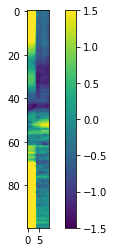

date:180323, rec:002, time:320.0, label:1.0
date:180323, rec:001, time:6533.0, label:1.0
date:180325, rec:004, time:3000.0, label:1.0
date:180330, rec:003, time:2361.0, label:1.0
date:180330, rec:003, time:6875.0, label:1.0
date:180327, rec:007, time:6751.0, label:0.0


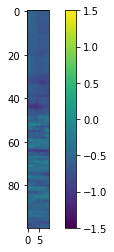

date:180330, rec:008, time:351.0, label:0.0


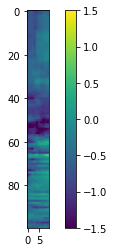

date:180324, rec:005, time:7105.0, label:1.0
date:180329, rec:005, time:3561.0, label:1.0
date:180411, rec:006, time:4305.0, label:1.0
date:180413, rec:003, time:4455.0, label:1.0
date:180324, rec:004, time:6913.0, label:1.0
date:180327, rec:005, time:6625.0, label:1.0
date:180414, rec:001, time:360.0, label:0.0


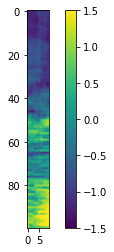

date:180323, rec:007, time:2895.0, label:0.0


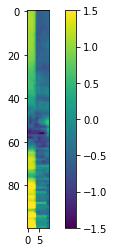

date:180330, rec:009, time:3400.0, label:0.0


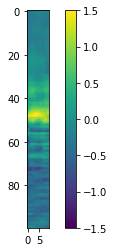

date:180413, rec:001, time:2720.0, label:0.0


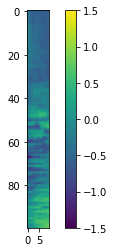

date:180323, rec:007, time:6941.0, label:0.0


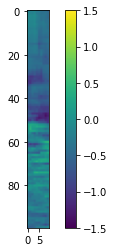

date:180327, rec:007, time:5971.0, label:0.0


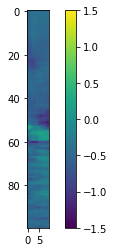

date:180413, rec:001, time:3603.0, label:0.0


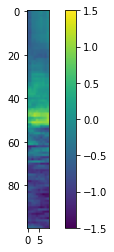

date:180325, rec:009, time:5799.0, label:1.0
date:180331, rec:003, time:6137.0, label:1.0
date:180329, rec:001, time:1050.0, label:0.0


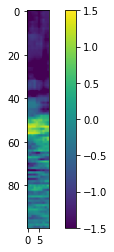

date:180330, rec:005, time:2927.0, label:1.0
date:180329, rec:003, time:383.0, label:1.0
date:180413, rec:002, time:5041.0, label:0.0


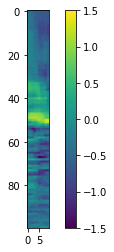

date:180330, rec:008, time:1081.0, label:0.0


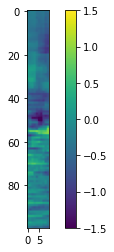

date:180325, rec:003, time:3953.0, label:1.0
date:180409, rec:006, time:6198.0, label:0.0


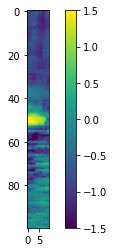

date:180327, rec:004, time:5733.0, label:1.0
date:180329, rec:001, time:5839.0, label:1.0
date:180325, rec:007, time:3799.0, label:0.0


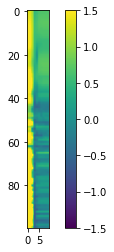

date:180327, rec:001, time:3292.0, label:1.0
date:180323, rec:002, time:2496.0, label:1.0
date:180323, rec:002, time:4286.0, label:1.0
date:180414, rec:007, time:2567.0, label:0.0


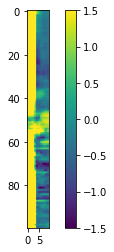

date:180327, rec:005, time:870.0, label:1.0
date:180327, rec:007, time:5191.0, label:0.0


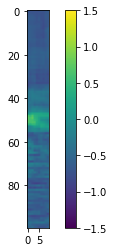

date:180331, rec:001, time:1680.0, label:0.0


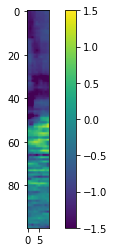

date:180414, rec:001, time:980.0, label:0.0


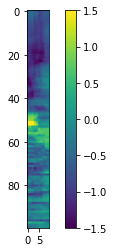

date:180324, rec:008, time:1721.0, label:0.0


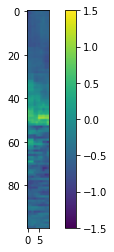

date:180410, rec:004, time:6872.0, label:1.0
date:180324, rec:006, time:3639.0, label:1.0
date:180414, rec:001, time:620.0, label:0.0


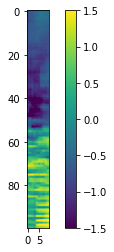

date:180325, rec:001, time:1680.0, label:0.0


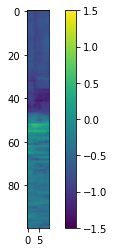

date:180329, rec:004, time:3154.0, label:1.0
date:180327, rec:007, time:1090.0, label:0.0


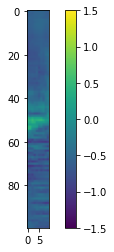

date:180410, rec:004, time:3730.0, label:1.0
date:180331, rec:003, time:4288.0, label:1.0
date:180324, rec:006, time:1483.0, label:1.0
date:180414, rec:007, time:3517.0, label:0.0


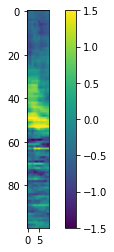

date:180409, rec:006, time:5118.0, label:0.0


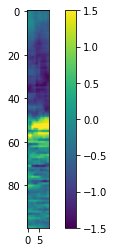

date:180414, rec:007, time:5248.0, label:0.0


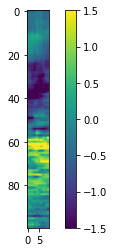

date:180413, rec:001, time:3693.0, label:0.0


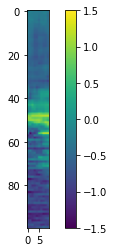

date:180413, rec:002, time:5381.0, label:0.0


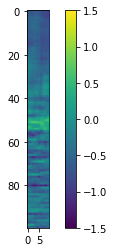

date:180322, rec:007, time:4660.0, label:0.0


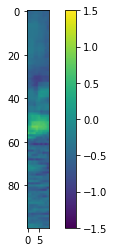

date:180411, rec:002, time:50.0, label:1.0
date:180401, rec:001, time:180.0, label:0.0


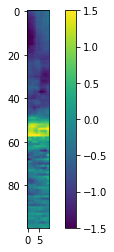

date:180410, rec:006, time:3394.0, label:1.0
date:180330, rec:005, time:3356.0, label:1.0
date:180325, rec:006, time:629.0, label:1.0
date:180322, rec:007, time:4980.0, label:0.0


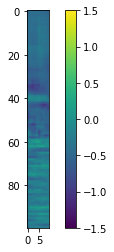

date:180411, rec:007, time:1210.0, label:0.0


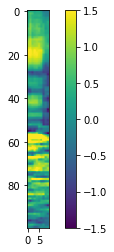

date:180413, rec:007, time:3882.0, label:1.0
date:180411, rec:007, time:620.0, label:0.0


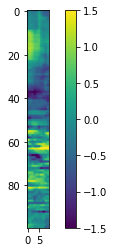

date:180410, rec:002, time:5372.0, label:1.0
date:180327, rec:004, time:830.0, label:1.0
date:180331, rec:001, time:550.0, label:0.0


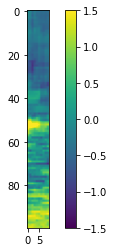

date:180327, rec:007, time:4120.0, label:0.0


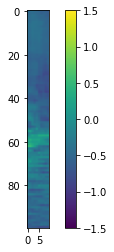

date:180329, rec:006, time:4757.0, label:0.0


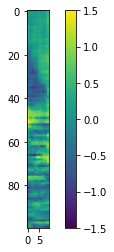

date:180413, rec:002, time:6861.0, label:0.0


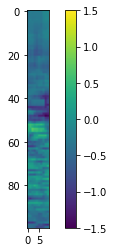

date:180329, rec:002, time:499.0, label:1.0
date:180324, rec:008, time:1241.0, label:0.0


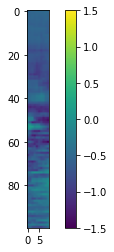

date:180330, rec:008, time:1731.0, label:0.0


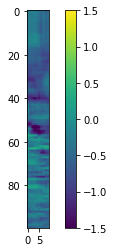

date:180325, rec:007, time:4453.0, label:0.0


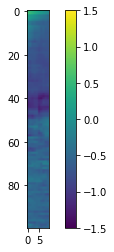

date:180330, rec:008, time:6005.0, label:0.0


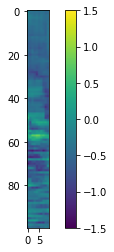

date:180409, rec:003, time:6317.0, label:1.0
date:180330, rec:008, time:1211.0, label:0.0


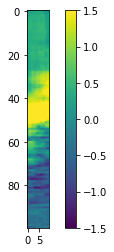

date:180330, rec:001, time:980.0, label:0.0


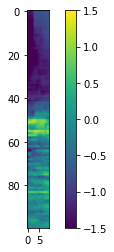

date:180329, rec:006, time:6121.0, label:1.0
date:180331, rec:001, time:5917.0, label:1.0
date:180327, rec:005, time:910.0, label:1.0
date:180327, rec:008, time:1752.0, label:0.0


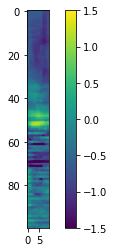

date:180327, rec:007, time:2030.0, label:0.0


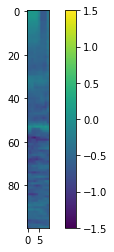

date:180330, rec:003, time:2281.0, label:1.0
date:180414, rec:001, time:3864.0, label:0.0


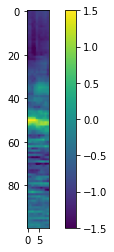

date:180324, rec:009, time:1158.0, label:0.0


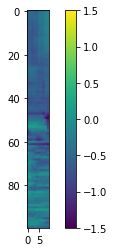

date:180413, rec:002, time:4291.0, label:0.0


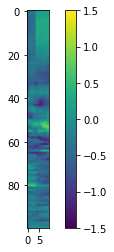

date:180331, rec:007, time:2397.0, label:0.0


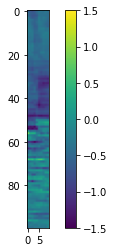

date:180327, rec:007, time:6591.0, label:0.0


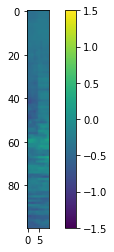

date:180331, rec:007, time:582.0, label:0.0


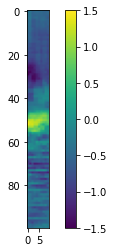

date:180331, rec:005, time:2322.0, label:1.0
date:180411, rec:003, time:467.0, label:1.0
date:180410, rec:003, time:1041.0, label:1.0
date:180331, rec:004, time:5217.0, label:1.0
date:180412, rec:001, time:4958.0, label:1.0
date:180409, rec:003, time:2579.0, label:1.0
date:180324, rec:004, time:4719.0, label:1.0
date:180327, rec:001, time:4511.0, label:1.0
date:180401, rec:001, time:5883.0, label:1.0
date:180322, rec:007, time:3539.0, label:0.0


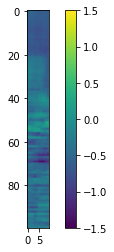

date:180325, rec:007, time:1548.0, label:0.0


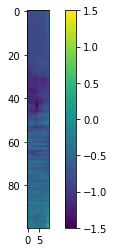

date:180323, rec:003, time:2821.0, label:1.0
date:180409, rec:006, time:5228.0, label:0.0


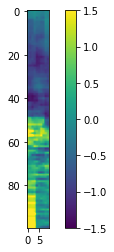

date:180413, rec:002, time:5841.0, label:0.0


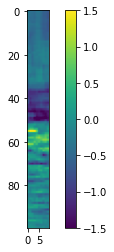

date:180330, rec:008, time:2806.0, label:0.0


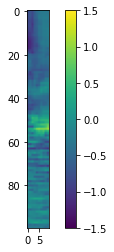

date:180325, rec:003, time:4023.0, label:1.0
date:180324, rec:001, time:2517.0, label:0.0


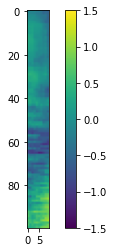

date:180324, rec:005, time:2934.0, label:1.0
date:180331, rec:007, time:582.0, label:0.0


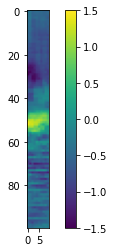

date:180323, rec:002, time:4556.0, label:1.0
date:180329, rec:001, time:4251.0, label:1.0
date:180329, rec:006, time:6545.0, label:1.0
date:180330, rec:009, time:3570.0, label:0.0


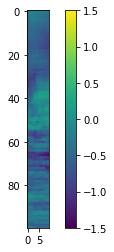

In [27]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

### Logistic regression with no regularization

In [28]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = [0]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'

timewindow = 10



0
Train loss for epoch 0: 0.7199430465698242
Val loss for epoch 0: 1.1159318685531616
Train loss for epoch 1: 0.4286876320838928
Val loss for epoch 1: 1.0738195180892944
1
Train loss for epoch 2: 0.4104776680469513
Val loss for epoch 2: 1.0514148473739624
2
Train loss for epoch 3: 0.3877258002758026
Val loss for epoch 3: 1.1218551397323608
Train loss for epoch 4: 0.3473021984100342
Val loss for epoch 4: 1.2499301433563232
Train loss for epoch 5: 0.33348318934440613
Val loss for epoch 5: 1.3287005424499512
Train loss for epoch 6: 0.31836944818496704
Val loss for epoch 6: 2.0656068325042725
Train loss for epoch 7: 0.320492684841156
Val loss for epoch 7: 1.9834054708480835
Train loss for epoch 8: 0.3232598304748535
Val loss for epoch 8: 2.1041834354400635
Train loss for epoch 9: 0.28262096643447876
Val loss for epoch 9: 1.7517322301864624
Train loss for epoch 10: 0.26767754554748535
Val loss for epoch 10: 1.8846752643585205
Train loss for epoch 11: 0.25687894225120544
Val loss for epoch 1

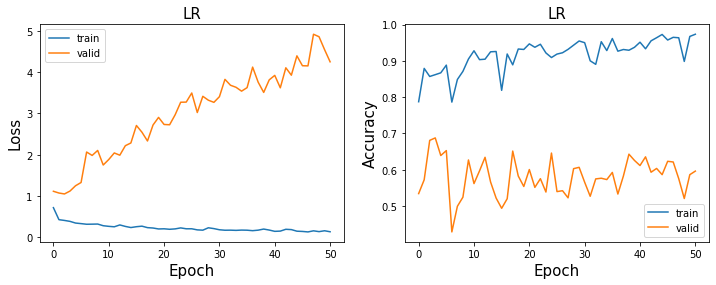

In [29]:
for a in alpha:
    print(a)
    model = GLM(input_dim=62*100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=a, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=a, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, a, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) 

In [30]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [0]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CHall_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
0          2


/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_all_Jester_all_2_upsample/LR_CHall_LOSSbce_REGnone0_EPOCH2_REDUCEsum_valbalanced.pt


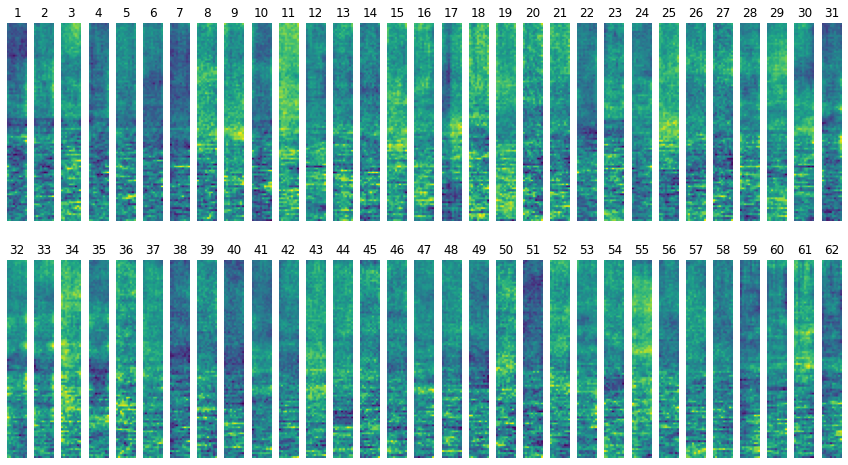

validation loss:1.0514148473739624 accuracy:0.6809815950920245
0.5
test loss:1.0687836408615112 accuracy:0.7037037037037037
0.82114595


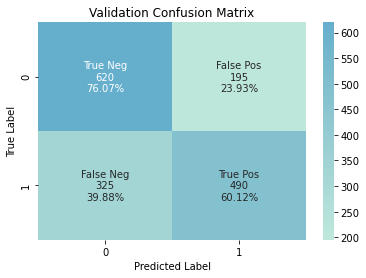

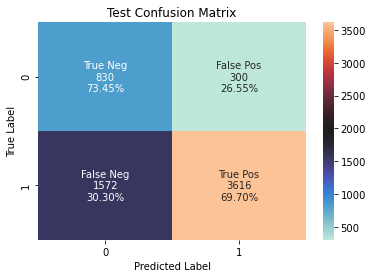

date:180711, rec:006, time:1702.0, label:1.0
Original data 62 CH


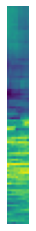

In [31]:
CH = 'all'
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM().to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show features
    weights = model.linear.weight.view(62, 100, 10)
    plt.figure(figsize=(15,8))
    for i in range(62):
        weights_sub = weights[i].detach().cpu()
        plt.subplot(2,31,i+1)
        plt.axis('off')
        plt.imshow(weights_sub)
        plt.title(str(i+1))
        # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### Logistic regression with L2 regularization

In [36]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'
CH = 'all'



Train loss for epoch 0: 0.6749762296676636
Val loss for epoch 0: 0.9569205641746521
Train loss for epoch 1: 0.43054720759391785
Val loss for epoch 1: 1.6989781856536865
Train loss for epoch 2: 0.41028451919555664
Val loss for epoch 2: 2.0218801498413086
Train loss for epoch 3: 0.40470561385154724
Val loss for epoch 3: 1.206276297569275
Train loss for epoch 4: 0.3915129005908966
Val loss for epoch 4: 1.6679754257202148
Train loss for epoch 5: 0.3313326835632324
Val loss for epoch 5: 1.6179039478302002
Train loss for epoch 6: 0.35745421051979065
Val loss for epoch 6: 1.3045971393585205
Train loss for epoch 7: 0.323350191116333
Val loss for epoch 7: 1.4211163520812988
Train loss for epoch 8: 0.3030873239040375
Val loss for epoch 8: 1.383519172668457
Train loss for epoch 9: 0.3345862030982971
Val loss for epoch 9: 1.553942084312439
Train loss for epoch 10: 0.29754433035850525
Val loss for epoch 10: 1.6841922998428345
Train loss for epoch 11: 0.30626365542411804
Val loss for epoch 11: 1.762

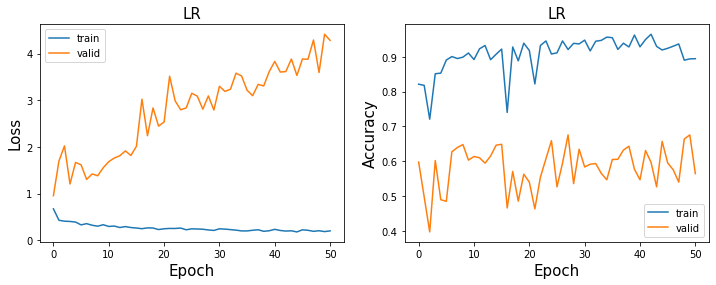

Train loss for epoch 0: 0.8895203471183777
Val loss for epoch 0: 0.874589741230011
Train loss for epoch 1: 0.5488551259040833
Val loss for epoch 1: 0.8689771890640259
1
Train loss for epoch 2: 0.5630313754081726
Val loss for epoch 2: 0.9965453147888184
Train loss for epoch 3: 0.5513467192649841
Val loss for epoch 3: 0.7747389078140259
3
Train loss for epoch 4: 0.581031858921051
Val loss for epoch 4: 0.9364913702011108
Train loss for epoch 5: 0.5401033163070679
Val loss for epoch 5: 0.7285481095314026
5
Train loss for epoch 6: 0.5051548480987549
Val loss for epoch 6: 0.7476139068603516
Train loss for epoch 7: 0.5320650339126587
Val loss for epoch 7: 1.1882282495498657
Train loss for epoch 8: 0.5316546559333801
Val loss for epoch 8: 0.9860981106758118
Train loss for epoch 9: 0.5952296257019043
Val loss for epoch 9: 1.1015514135360718
Train loss for epoch 10: 0.5233498811721802
Val loss for epoch 10: 0.9335004091262817
Train loss for epoch 11: 0.5373948216438293
Val loss for epoch 11: 1.4

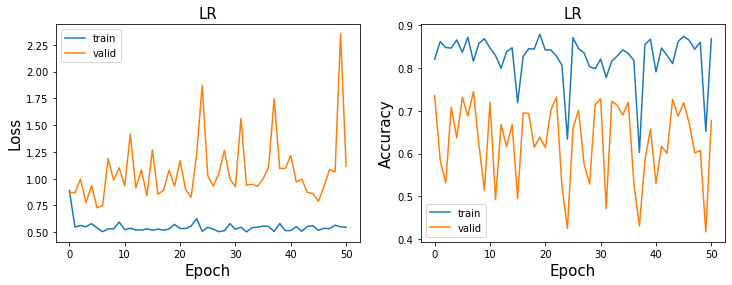

Train loss for epoch 0: 0.83763587474823
Val loss for epoch 0: 0.6893921494483948
Train loss for epoch 1: 0.5759751200675964
Val loss for epoch 1: 0.8223748207092285
Train loss for epoch 2: 0.6035597324371338
Val loss for epoch 2: 0.917934775352478
Train loss for epoch 3: 0.6057626008987427
Val loss for epoch 3: 0.8523551225662231
Train loss for epoch 4: 0.5846854448318481
Val loss for epoch 4: 1.0727274417877197
Train loss for epoch 5: 0.5827662944793701
Val loss for epoch 5: 1.0707802772521973
Train loss for epoch 6: 0.5472012758255005
Val loss for epoch 6: 0.8132855296134949
Train loss for epoch 7: 0.5784297585487366
Val loss for epoch 7: 0.9807385802268982
Train loss for epoch 8: 0.5875237584114075
Val loss for epoch 8: 0.9692310690879822
Train loss for epoch 9: 0.5961386561393738
Val loss for epoch 9: 0.8563536405563354
Train loss for epoch 10: 0.5571922063827515
Val loss for epoch 10: 1.1178430318832397
Train loss for epoch 11: 0.563152015209198
Val loss for epoch 11: 1.449087738

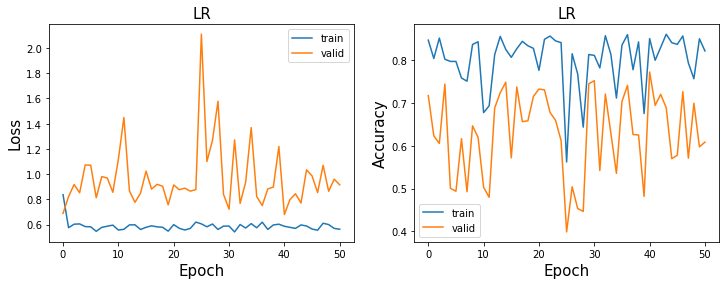

In [33]:
for alpha in alphas:
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []
    model = GLM(62*100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # reduction = 'sum', Goose_1st_2

In [40]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [50,100]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CHall_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
50         5
100       40


/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_all_Jester_all_2_upsample/LR_CHall_LOSSbce_REGl250_EPOCH5_REDUCEsum_valbalanced.pt


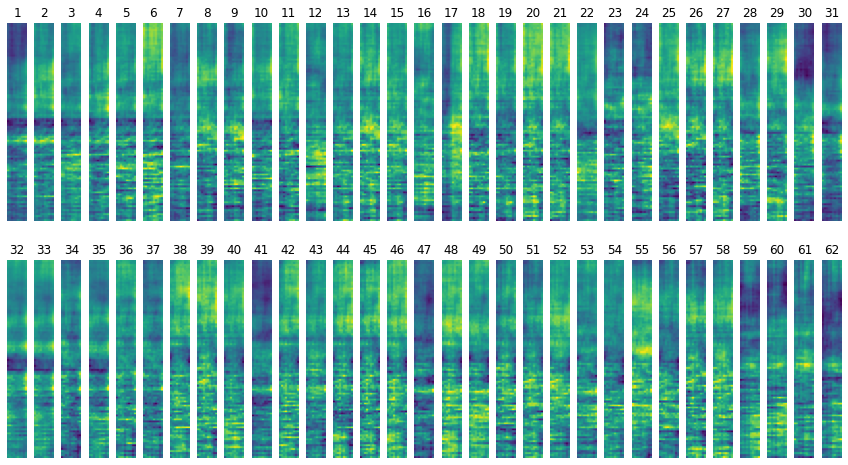

validation loss:0.7285481095314026 accuracy:0.7312883435582822
0.5
test loss:0.6121120452880859 accuracy:0.785375118708452
0.82114595


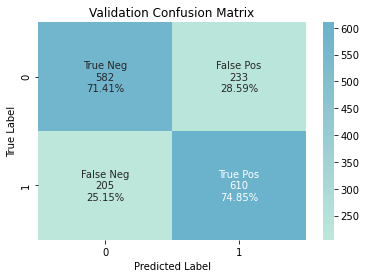

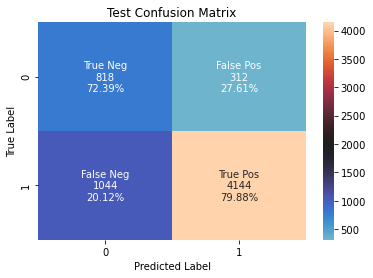

date:180711, rec:004, time:1512.0, label:1.0
Original data 62 CH


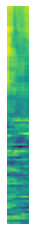

/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_all_Jester_all_2_upsample/LR_CHall_LOSSbce_REGl2100_EPOCH40_REDUCEsum_valbalanced.pt


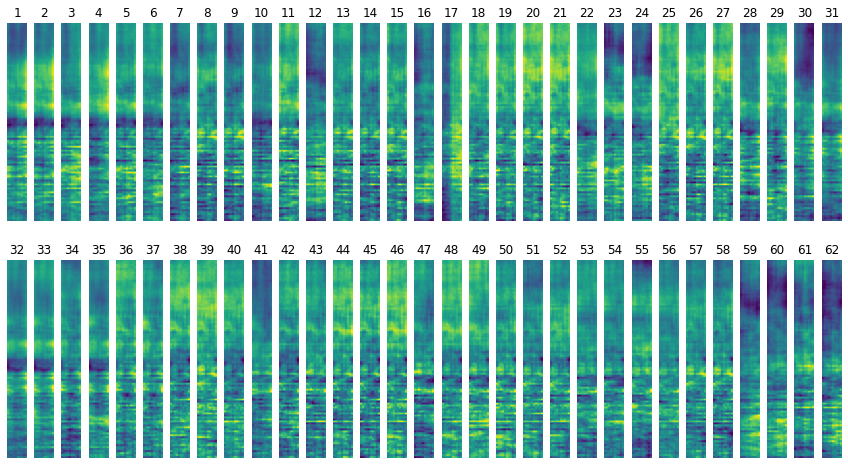

validation loss:0.6803005337715149 accuracy:0.7723926380368098
0.5
test loss:0.48989686369895935 accuracy:0.8602405824628047
0.82114595


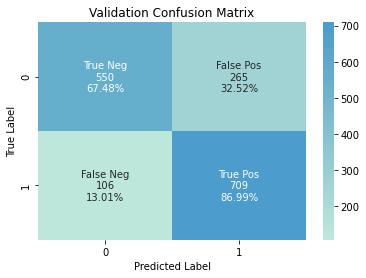

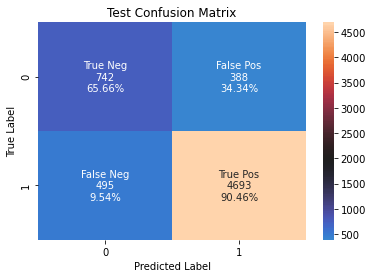

date:180711, rec:004, time:1512.0, label:1.0
Original data 62 CH


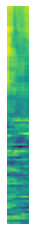

In [41]:
CH = 'all'
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM().to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show features
    weights = model.linear.weight.view(62, 100, 10)
    plt.figure(figsize=(15,8))
    for i in range(62):
        weights_sub = weights[i].detach().cpu()
        plt.subplot(2,31,i+1)
        plt.axis('off')
        plt.imshow(weights_sub)
        plt.title(str(i+1))
        # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### Logistic Regression with finite difference regularization

In [42]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'

timewindow = 10

Train loss for epoch 0: 0.6912611722946167
Val loss for epoch 0: 1.2281674146652222
Train loss for epoch 1: 0.40369608998298645
Val loss for epoch 1: 1.1663247346878052
1
Train loss for epoch 2: 0.4326375126838684
Val loss for epoch 2: 1.196449875831604
Train loss for epoch 3: 0.39023569226264954
Val loss for epoch 3: 1.1494264602661133
3
Train loss for epoch 4: 0.3776254951953888
Val loss for epoch 4: 1.387945532798767
Train loss for epoch 5: 0.37062492966651917
Val loss for epoch 5: 1.3757507801055908
Train loss for epoch 6: 0.33790484070777893
Val loss for epoch 6: 2.315408945083618
Train loss for epoch 7: 0.33490705490112305
Val loss for epoch 7: 1.6242809295654297
Train loss for epoch 8: 0.3482421636581421
Val loss for epoch 8: 1.5251058340072632
Train loss for epoch 9: 0.3170108199119568
Val loss for epoch 9: 1.8246018886566162
Train loss for epoch 10: 0.310749888420105
Val loss for epoch 10: 1.6772687435150146
Train loss for epoch 11: 0.3125627934932709
Val loss for epoch 11: 2.

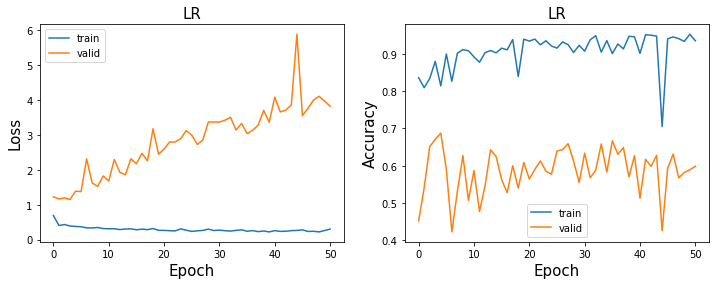

Train loss for epoch 0: 0.7145413160324097
Val loss for epoch 0: 1.0110621452331543
Train loss for epoch 1: 0.5433011651039124
Val loss for epoch 1: 1.0231122970581055
Train loss for epoch 2: 0.47474753856658936
Val loss for epoch 2: 1.3076989650726318
Train loss for epoch 3: 0.49937981367111206
Val loss for epoch 3: 1.0681636333465576
Train loss for epoch 4: 0.5062425136566162
Val loss for epoch 4: 1.0232795476913452
Train loss for epoch 5: 0.4731019139289856
Val loss for epoch 5: 1.1633354425430298
Train loss for epoch 6: 0.49394726753234863
Val loss for epoch 6: 1.1356616020202637
Train loss for epoch 7: 0.4683282971382141
Val loss for epoch 7: 1.658527135848999
Train loss for epoch 8: 0.47385373711586
Val loss for epoch 8: 1.2614765167236328
Train loss for epoch 9: 0.46950796246528625
Val loss for epoch 9: 1.3092625141143799
Train loss for epoch 10: 0.5152888894081116
Val loss for epoch 10: 1.8666787147521973
Train loss for epoch 11: 0.48718416690826416
Val loss for epoch 11: 1.359

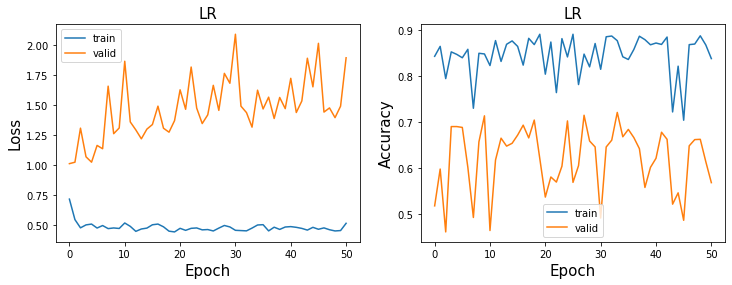

Train loss for epoch 0: 0.7810987830162048
Val loss for epoch 0: 0.9384655356407166
Train loss for epoch 1: 0.5444942116737366
Val loss for epoch 1: 1.1203166246414185
Train loss for epoch 2: 0.5217208862304688
Val loss for epoch 2: 1.1535618305206299
Train loss for epoch 3: 0.5067653656005859
Val loss for epoch 3: 1.0472296476364136
Train loss for epoch 4: 0.504459023475647
Val loss for epoch 4: 1.0981402397155762
Train loss for epoch 5: 0.5004528164863586
Val loss for epoch 5: 1.0463670492172241
Train loss for epoch 6: 0.4762183129787445
Val loss for epoch 6: 1.0751194953918457
Train loss for epoch 7: 0.49398183822631836
Val loss for epoch 7: 1.0821723937988281
Train loss for epoch 8: 0.4938943088054657
Val loss for epoch 8: 1.7050435543060303
Train loss for epoch 9: 0.4974420666694641
Val loss for epoch 9: 1.1240729093551636
Train loss for epoch 10: 0.5087378025054932
Val loss for epoch 10: 1.3059550523757935
Train loss for epoch 11: 0.4872472286224365
Val loss for epoch 11: 1.15159

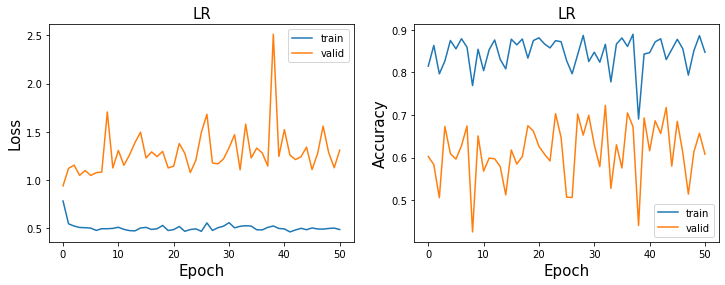

In [43]:
for alpha in alphas:
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []
    model = GLM(62*100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

In [44]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [1,50,100]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CHall_' in s and reg_alpha in s and '_valbalanced' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1          3
50         0
100        0


/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_all_Jester_all_2_upsample/LR_CHall_LOSSbce_REGfinite_diff1_EPOCH3_REDUCEsum_valbalanced.pt


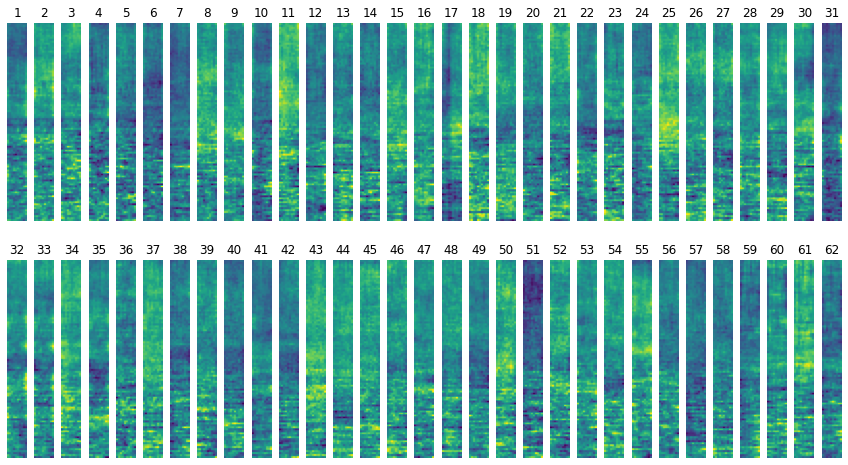

validation loss:1.1494264602661133 accuracy:0.6705521472392638
0.5
test loss:1.054758071899414 accuracy:0.7071858182969294
0.82114595


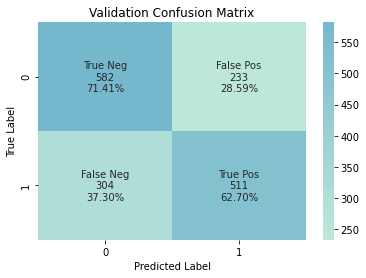

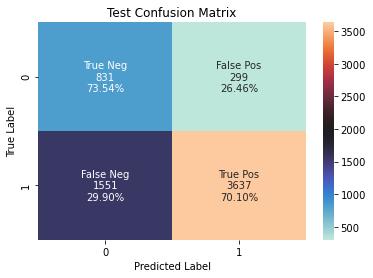

date:180711, rec:006, time:1702.0, label:1.0
Original data 62 CH


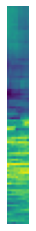

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_all_Jester_all_2_upsample/LR_CHall_LOSSbce_REGfinite_diff50_EPOCH0_REDUCEsum_valbalanced.pt'

In [45]:
CH = 'all'
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM().to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show features
    weights = model.linear.weight.view(62, 100, 10)
    plt.figure(figsize=(15,8))
    for i in range(62):
        weights_sub = weights[i].detach().cpu()
        plt.subplot(2,31,i+1)
        plt.axis('off')
        plt.imshow(weights_sub)
        plt.title(str(i+1))
        # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### SVM without regularization

In [22]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0 
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'none' # expect to be bad, since predictions could be arbitrarily far from boundaries
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [13]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6105479598045349
Val loss for epoch 0: 1.2834664583206177
Train loss for epoch 1: 0.5602447986602783
Val loss for epoch 1: 0.9178999662399292
1
Train loss for epoch 2: 0.4674215018749237
Val loss for epoch 2: 3.1678149700164795
Train loss for epoch 3: 0.5240594744682312
Val loss for epoch 3: 0.9516066312789917
Train loss for epoch 4: 0.4172993004322052
Val loss for epoch 4: 1.5819454193115234
Train loss for epoch 5: 0.4704030156135559
Val loss for epoch 5: 1.1257431507110596
Train loss for epoch 6: 0.3469279408454895
Val loss for epoch 6: 1.4243940114974976
Train loss for epoch 7: 0.3866455554962158
Val loss for epoch 7: 1.1779205799102783
Train loss for epoch 8: 0.33019065856933594
Val loss for epoch 8: 1.365188479423523
Train loss for epoch 9: 0.3815663754940033
Val loss for epoch 9: 1.5121104717254639
Train loss for epoch 10: 0.40764206647872925
Val loss for epoch 10: 1.7473173141479492
Train loss for epoch 11: 0.3409585654735565
Val loss for epoch 11: 1.27

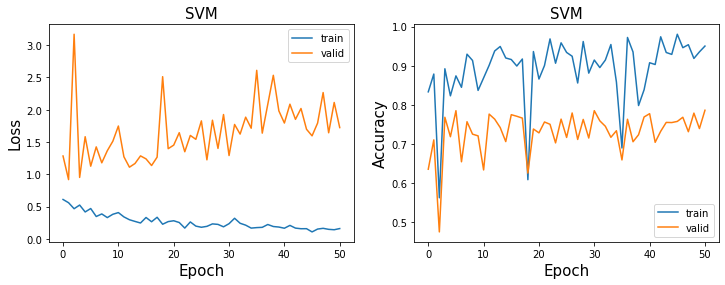

In [14]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [23]:
best_epoch = 1

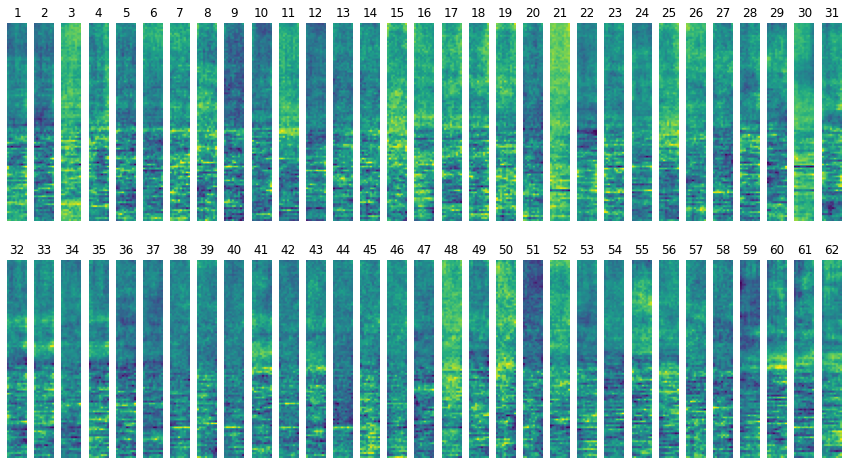

In [24]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [27]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_3 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7428555488586426 accuracy:0.7838461538461539


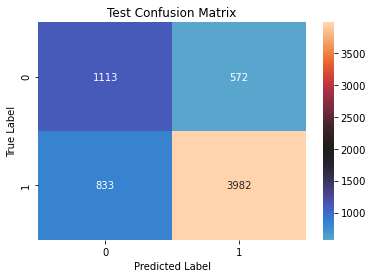

In [28]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


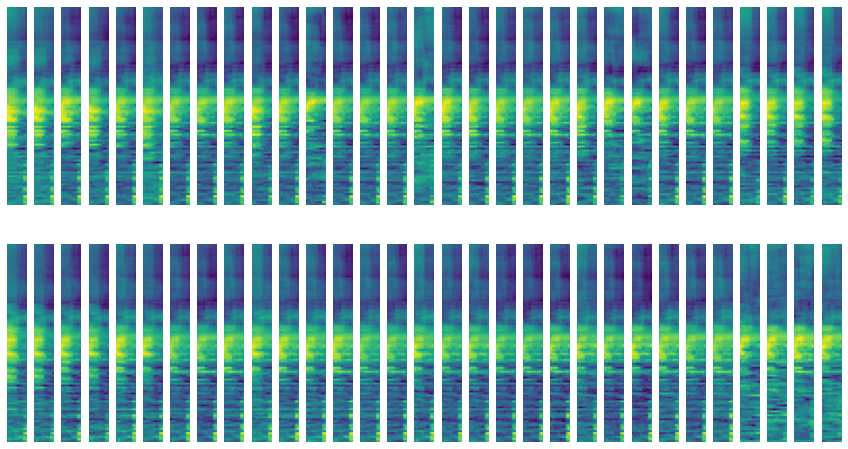

In [30]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_3[0][0], cases_wrong_3[0][1], cases_wrong_3[0][1], cases_wrong_3[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_3[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with L2 regularization

In [31]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5 # have special meaning as margin, corresponding to 1 in the hinge loss
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [16]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.142331600189209
Val loss for epoch 0: 2.375016927719116
Train loss for epoch 1: 0.8872479200363159
Val loss for epoch 1: 0.9689788222312927
1
Train loss for epoch 2: 0.9464882612228394
Val loss for epoch 2: 1.0704563856124878
Train loss for epoch 3: 0.8319297432899475
Val loss for epoch 3: 1.3819953203201294
Train loss for epoch 4: 0.9815953969955444
Val loss for epoch 4: 2.2135136127471924
Train loss for epoch 5: 0.9559652209281921
Val loss for epoch 5: 1.3571209907531738
Train loss for epoch 6: 0.9480046629905701
Val loss for epoch 6: 0.958657443523407
6
Train loss for epoch 7: 0.8747104406356812
Val loss for epoch 7: 1.0527974367141724
Train loss for epoch 8: 0.938942551612854
Val loss for epoch 8: 1.816292405128479
Train loss for epoch 9: 1.033324956893921
Val loss for epoch 9: 1.2031350135803223
Train loss for epoch 10: 0.908989667892456
Val loss for epoch 10: 0.6989802718162537
10
Train loss for epoch 11: 0.9314482808113098
Val loss for epoch 11: 1.08010

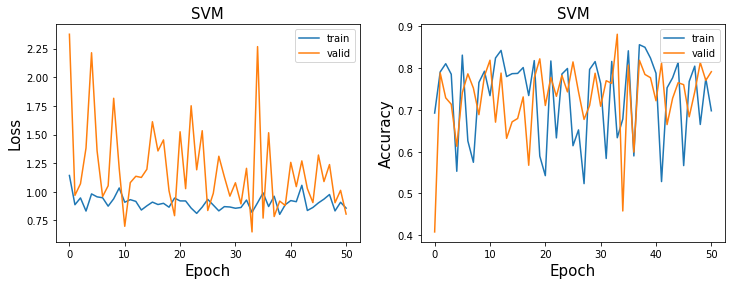

In [17]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [32]:
best_epoch = 33

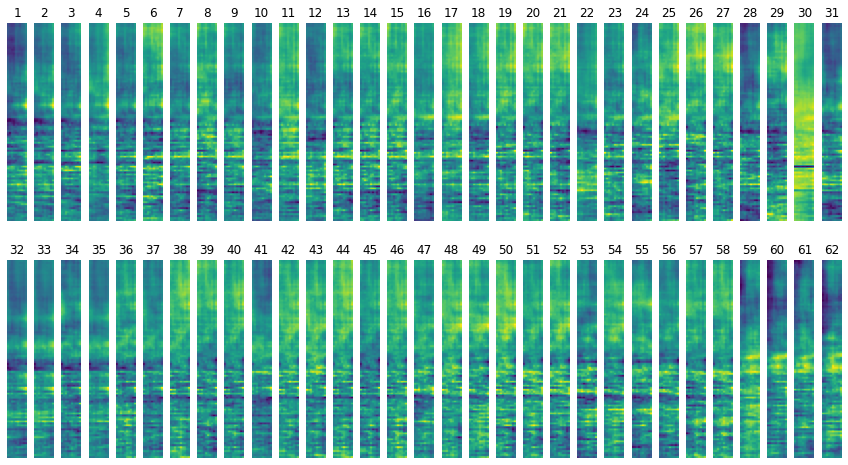

In [33]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [34]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:1.2684636116027832 accuracy:0.7512307692307693


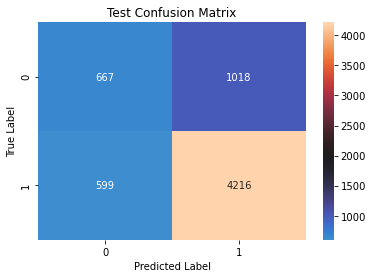

In [35]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


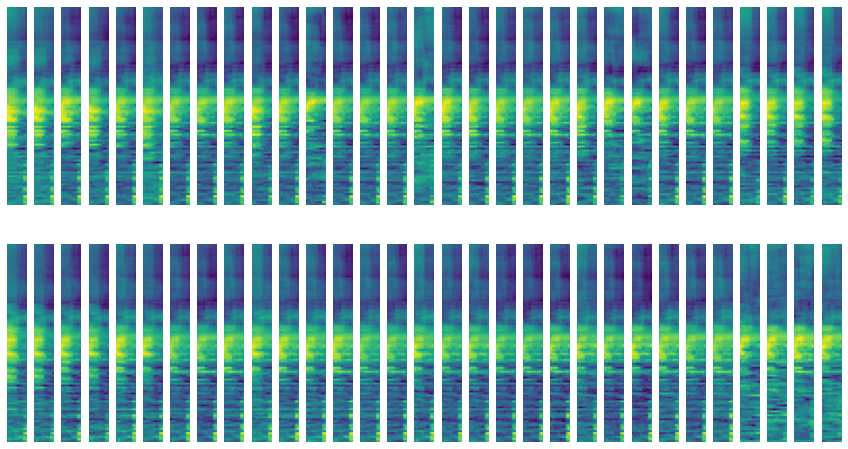

In [36]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_4[0][0], cases_wrong_4[0][1], cases_wrong_4[0][1], cases_wrong_4[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_4[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with finite difference regularization

In [37]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [19]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.1333791017532349
Val loss for epoch 0: 1.699452519416809
Train loss for epoch 1: 0.7799455523490906
Val loss for epoch 1: 1.1568527221679688
1
Train loss for epoch 2: 0.8088831305503845
Val loss for epoch 2: 1.5023279190063477
Train loss for epoch 3: 0.7681555151939392
Val loss for epoch 3: 1.125550389289856
3
Train loss for epoch 4: 0.779151201248169
Val loss for epoch 4: 0.9314382076263428
4
Train loss for epoch 5: 0.6864786744117737
Val loss for epoch 5: 1.0832509994506836
Train loss for epoch 6: 0.6971858739852905
Val loss for epoch 6: 1.0215011835098267
Train loss for epoch 7: 0.7639809250831604
Val loss for epoch 7: 1.7163935899734497
Train loss for epoch 8: 0.7523619532585144
Val loss for epoch 8: 1.3559271097183228
Train loss for epoch 9: 0.837641179561615
Val loss for epoch 9: 1.0237863063812256
Train loss for epoch 10: 0.7160231471061707
Val loss for epoch 10: 1.128845453262329
Train loss for epoch 11: 0.7040753364562988
Val loss for epoch 11: 3.2867

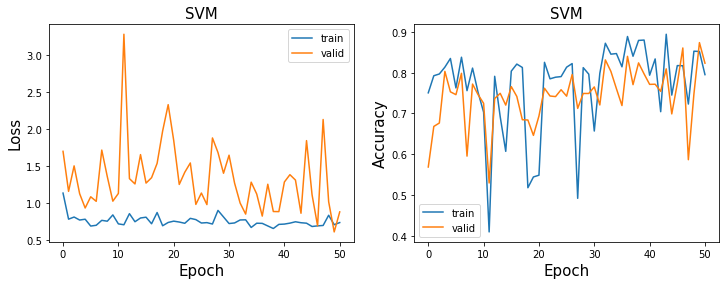

In [20]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [38]:
best_epoch = 49

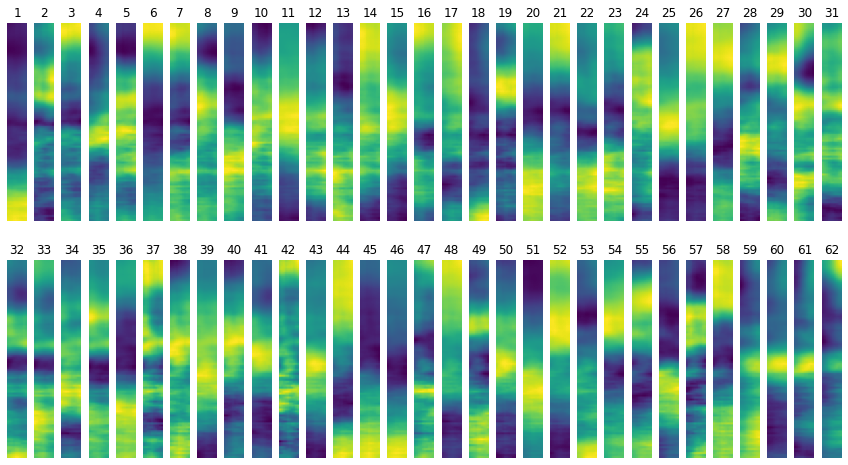

In [39]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [40]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.8956817984580994 accuracy:0.8355384615384616


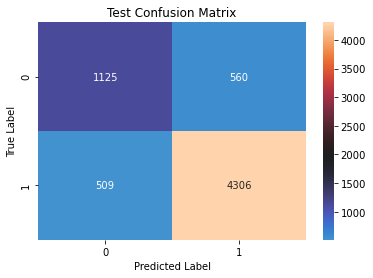

In [41]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


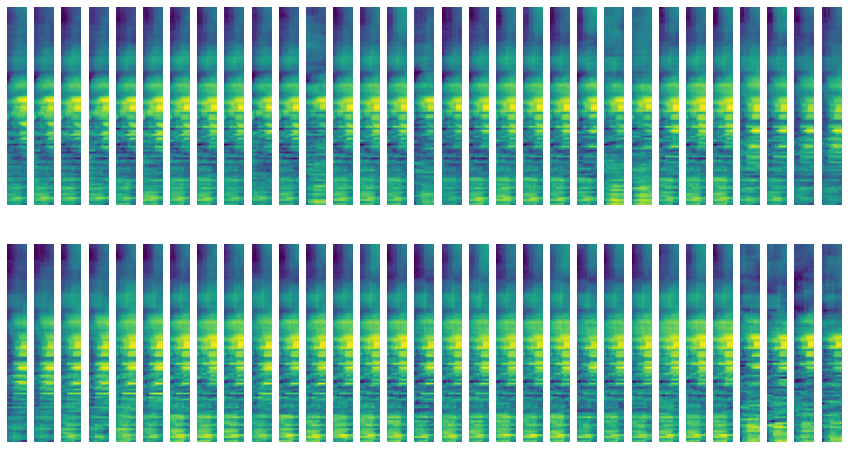

In [42]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_5[0][0], cases_wrong_5[0][1], cases_wrong_5[0][1], cases_wrong_5[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_5[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()